# Stuff to do
* in final app, give them just the allowed options (dropdown menu, for example)

In [1]:
from cmp import *
import pdir
%matplotlib notebook
np.seterr(invalid='ignore')
np.set_printoptions(threshold=np.nan)

In [2]:
# Inputs
eq = np.isclose
# Lattice vectors (3 vectors of length 3)
a = 1
b = 2
a1 = np.array([1, 0, 0])
a2 = np.array([0, 1, 0])
a3 = np.array([0, 0, 1])
theta = 80*np.pi/180

# Array of basis vectors
basis = np.array([[0,0,0],[0.5,0.5,0],[0.5,0,0.5],[0,0.5,0.5]])
# Colors for each of the basis vectors
blargh = ('r', 'r','b','b')
# Size multiplier for each of the atoms. Default is 1
sizes = (2,2,1,1)
verbose = True


# Gridline type:
# Soft: Lines along cartesian axes. Takes into account nonequal lattice spacing
# LatticeVectors: Lines along the latticevectors (only on lattice points)
GridType = "lattice"

# Limit type:
# individual: Sets the limits as max(nx*a1,ny*a2,nz*a3), so we include nx unitcells in the a1 direction, etc.
# sum: Sets the limits r_min = n_min*[a1 a2 a3] and likewise for n_max
LimType = "dynamic"
Maxs = [2,2,2]
Mins = [0,0,0]

LatticeType = "conventional fcc"

#Lattice(lattice_name = LatticeType, colors = blargh, sizes = sizes, max_ = Maxs, verbose=True)
#Reciprocal(lattice_name=LatticeType, indices=(1,1,0))

In [3]:
k0 = np.linspace(0,np.pi/2, 100)
x0 = np.cos(k0)
P = 1

def fx(x, k, V0):
    X = np.sqrt(2)*x
    sin0 = np.sin(X)
    cos0 = np.cos(X)
    f = cos0 - V0*sin0/(X) - np.cos(k)
    return f

def fxprime(x, k, V0):
    scale = np.sqrt(2)
    X = scale * x
    sin0 = np.sin(X)
    cos0 = np.cos(X)
    fprime = -scale * sin0 + V0 * scale * sin0 / (2 * x**2) - V0 * cos0/x
    return fprime

def newtn(x, k, P, a=1):
    sin0 = np.sin(x)
    cos0 = np.cos(x)
    next_ = -(cos0*x - np.cos(k*a)*x-sin0)*x/(sin0*x*x + cos0*x - sin0)
    return next_

def newtn_calc(x, k, P, iterations = 10):
    for i in range(iterations):
        x -= newtn(x, k, P)
    return x



#alpha = newtn_calc(x0, k0, 1)

## Deleting NaN
#alpha_NaN = np.isnan(alpha)
#alpha = alpha[~alpha_NaN]
#k = k0[~alpha_NaN]

## Restricting values to below 1.1*pi² and above 0
#usable = alpha < 1.1* np.amax(k0)**2
#above = alpha >= 0
#ids = np.arange(alpha.size)
#non_usable_index=ids[~ (above*usable)]
#least_index = np.amin(non_usable_index)
#usable_index = np.arange(least_index)
#alpha = alpha[usable_index]
#k = k[usable_index]

#fig = plt.figure()
#ax = fig.gca()
#ax.plot(k,alpha)

<IPython.core.display.Javascript object>


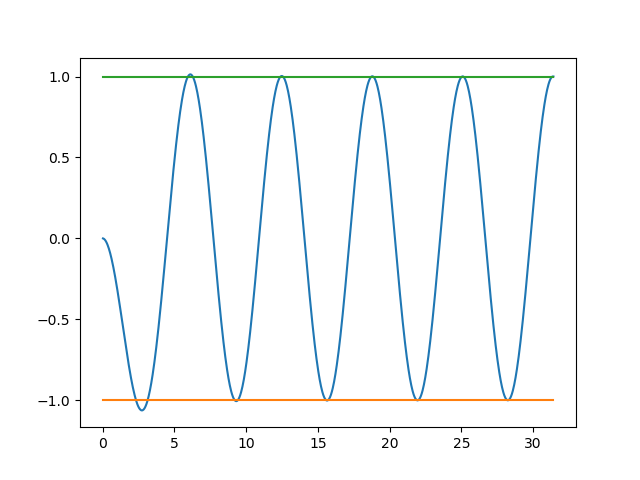

In [19]:
P = 1
N = 1000
alpha0 = np.linspace(0, 10*np.pi, N)
coska = (np.cos(alpha0) - P*np.sinc(alpha0/np.pi))

## restricting the function to -1 <= coska <= 1
above = coska > 1
below = coska < -1
usable = ~above * ~below
ids = np.arange(N)
first_band_start = np.amin(ids[usable])
coska_minus_0 = coska[ids>first_band_start]
alpha0_plot = alpha0[ids>first_band_start]

above_1 = coska_minus_0 > 1
below_1 = coska_minus_0 < -1
usable_1 = ~above_1 * ~below_1
ids_1 = np.arange(coska_minus_0.size)
first_band_end = np.amin(ids_1[~usable_1])

fig = plt.figure()
ax = fig.gca()
ax.plot(alpha0_plot, coska_minus_0)
ax.plot([np.amin(alpha0), np.amax(alpha0)],[-1, -1])
ax.plot([np.amin(alpha0), np.amax(alpha0)],[1, 1])